<a href="https://colab.research.google.com/github/anastasiiaCher/python-for-DPaV/blob/main/labs/%D0%9B%D0%A07_%D0%9F%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B8_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B3%D1%80%D0%B0%D1%84%D0%B0_%D0%BA%D0%BB%D1%8E%D1%87%D0%B5%D0%B2%D1%8B%D1%85_%D1%81%D0%BB%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Постановка задачи


**Цель работы:** применение навыков обработки текстовых данных и представление их структуры в виде графа.

**Краткое описание:** в ходе выполнения лабораторной работы необходимо обработать текстовые записи, содержащие частичное или полное дублирование информации, построить по ним граф учебных сущностей (ключевых слов) и проанализировать его.

# Данные


В папке [Data/lab7](https://drive.google.com/drive/folders/1evptVrCRePzO6MGu0tzGAPOVdkcrB9Q3?usp=drive_link) находятся две таблицы с данными о дисциплинах Университета ИТМО, рабочие программы которых расположены в [Конструкторе ОП](https://op.itmo.ru). Все задания лабораторной работы необходимо выполнять по этим данным.

### Таблица ```items.xlsx```
##### **Описание**
Таблица содержит учебные сущности, встречающиеся в рабочих программах дисциплин и распределенные по предметным областям.

##### **Формат данных**

```
id,name,domain
202,Алгоритм Форда-Фалкерсона,Теория графов (часть Математики)
16866,Обратные задачи биофизики,Биотехнологии
...
```
##### **Описание полей**

 - ```id``` — идентификатор учебной сущности;
 - ```name``` — наименование учебной сущности;
 - ```domain``` — предметная область, к которой относится учебная сущность (может отсутствовать).


### Таблица ```descriptions.xlsx```
##### **Описание**
Таблица содержит текстовые аннотации к дисциплинам.

##### **Формат данных**

```
id,title,description
22694,Анализ и моделирование бизнес-процессов,
14958,Исследуя виртуальную реальность: методы и подходы,Курс направлен на знакомство с методами взаимодействия и изучения игр. В рамках курса студенты разберут разные подходы к изучению игр с использованием методов цифровых гуманитарных наук, а также классические подходы.
21258,Графовые базы данных,Из этого курса вы узнаете об одной из разновидностей современных нереляционных баз данных: графовых. Графовые базы данных хранят данные, организованные в графы: структуры, состоящие из узлов, хранящих данные, и связей между ними. На графовые базы данных отлично ложатся социальные сети, рекомендательные системы, другие слабо структурированные данные с большим числом разнообразных связей. Также графовые СУБД предоставляют средства для анализа графов. В курсе будет рассмотрена графовая СУБД Neo4j, её язык запросов Cypher и интерфейс пользователя для выполнения запросов и визуализации результата.
...
```
##### **Описание полей**

 - ```id``` — идентификатор дисциплины;
 - ```title``` — название дисциплины;
 - ```description``` — аннотация дисциплины (может отсутствовать).

# Практические задания

## Краткий анализ предметных областей

Посчитайте количество разных предметных областей. В таблице с учебными сущностями некоторые предметные области являются частями других прдметных областей. Например, есть предметная область "Математика" и есть "Теория графов (часть Математики)". Такие области следует объединить в область "Математика".

### Задание 1
1. Выведите датафрейм, в котором будет указано название предметной области и количество разных учебных сущностей, относящихся к конкретной предметной области.
2. Сделайте визуализацию предметных областей.

In [ ]:
# PUT YOUR CODE HERE

## Обработка дублирующихся и некорректных сущностей

В таблице учебных сущностей существуют дубликаты. На рисунке ниже приведен пример: "Матрица" и "Матрицы" – это на самом деле одна и та же учебная сущность.

<img src="https://drive.google.com/uc?id=1wwLYp09phmW_MzXIr4Ay32hOFK8cb1U8" alt="entities matrix">

Также дубликаты могут быть неявными. В примере на следующем рисунке дублирующиеся сущности подчеркнуты красным цветом. "Git", "GIT", "Навыки работы с Git" и "Система контроля версий git" – это все об одной и той же сущности.

<img src="https://drive.google.com/uc?id=132QRARhcJzN1jyH_v-0utHKCpHAtLR81" alt="entities git">

Выделим несколько групп критериев, по которым можно определить, что две или более учебных сущностей являются дубликатами.

#### **Морфологические критерии**
1. Если у двух сущностей разные идентификаторы и они относятся к разным предметным областям, но их названия полностью совпадают, то это одна и та же сущность.
2. Если есть две сущности, которые различаются только регистром букв, которые входят в их названия, то это одна и та же сущность.
3. Если две сущности совпадают после удаления из них всех знаков препинания, спецсимволов и повторяющихся пробелов в любом месте строки, то это одна и та же сущность.
4. Если две сущности совпадают после удаления из них опечаток, то это одна и та же сущность.
5. Если две сущности совпадают после их перевода на один язык, то это одна и та же сущность.
6. Если после лемматизации двух сущностей множества их лемм совпадают, то это одна и та же сущность.

#### **Критерии, основанные на численных представлениях сущностей**
1. Если косинусное сходство векторов TF-IDF двух сущностей превышает заданный порог, то это одна и та же сущность.
2. Если косинусное сходство контекстных эмбеддингов двух сущностей превышает заданный порог, то это одна и та же сущность.

#### **Критерии некорректности сущностей**
1. Если сущность начинается со строчной буквы, то эта сущность, скорее всего, некорректна.
2. Если сущность содержит более 6 слов, то эта сущность, скорее всего, некорректна.
3. Если сущность заканчивается знаком препинания, то эта сущность, скорее всего, некорректна.
4. Если сущность содержит союз "и", то эта сущность, скорее всего, некорректна.

### Задание 2

1. Примените ко всем учебным сущностям перечисленные выше проверки на корректность.
2. Добавьте в датафтейм столбец с логическим значением, указывающим на корректность или некорректность сущности.
3. Постройте визуализацию, отражающую соотношение количества корректных и некорректных сущностей в каждой предметной области.

In [ ]:
# PUT YOUR CODE HERE

### Задание 3


1. Реализуйте минимум 4 морфологических критерия определения дубликатов. Подсчитайте количество дубликатов, которые удалось найти с помощью этого критерия.
2. Реализуйте минимум 1 критерий выявления дубликатов, основанный на численных представлениях сущностей. Подсчитайте количество дубликатов, которые удалось найти с помощью этого критерия.
3. Добавьте в датафрейм с учебными сущностями столбец `duplicates`. Поместите в этот столбец список дубликатов для каждой учебной сущности.
4. Покажите на графике количество дубликатов, которые удалось найти с помощью каждого из реализованных критериев.

In [ ]:
# PUT YOUR CODE HERE

## Граф учебных сущностей


**Граф** ($G(V, E)$) – математичекая модель представления системы объектов, обладающих парными связями. Представляет собой совокупность двух множеств: множества объектов (вершин $V$) и множества связей между объектами (ребер $E$).

Теория графов применяется в самых разных областях технических наук. В анализе данных к известным задачам, решаемыми алгоритмами теории графов, можно отнести:


*   анализ соцсетей;
*   анализ структуры текста.

В общем случае при помощи графов можно визуализировать любую систему объектов, попарно связанных между собой.


### Некоторые определения



*   **Порядок** – количество вершин графа.
*   **Размер** – количество ребер графа.
*   **Смежные вершины** – две вершины, соединенные одним ребром.
*   **Смежные ребра** – ребра, инцидентные одной вершине.
*   **Степень вершины** – количество инцидентных вершине ребер (т.е. сколько ребер связано с вершиной).
*   **Изолированная вершина** – вершина, не связанная ни с одним ребром.
*   **Висячая вершина** – вершина всего с одним ребром.
*   **Псевдограф** – граф, имеющий петли.
*   **Мультиграф** – граф с кратными ребрами (кратные ребра – те, у которых обе концевые вершины совпадают).
*   **Ориентированный граф** – имеет дуги вместо ребер, одна из двух концевых вершин является начальной, вторая – конечной.
*   **Связный граф** – граф, в котором есть путь для любых двух вершин.
*   **Плотность** – отношение числа ребер графа к числу ребер в соответствующем полном графе.
*   **Полный граф** – граф, в котором каждая пара вершин смежна.
*   **Клика** – подмножество вершин, любые две из которых соединены ребром.



Популярной задачей при построении графа является **выделение центральных вершин**. Подходов к определению центральности вершины существует несколько:


*   Центральность по посредничеству (Betweenness centrality) – показывает, через какие вершины проходит наибольшее количество кратчайших путей
  
  *      Для каждой пары вершин ($s$,$t$) вычисляются кратчайшие пути между ними.
  *      Для каждой пары вершин ($s$,$t$) определяется доля кратчайших путей, которые проходят через рассматриваемую вершину.
  *      Суммируем эти доли по всем парам вершин ($s$,$t$).


*   Центральность по собственному вектору или влиятельности (Eigenvector centrality) – показывает, насколько тесно связана вершина с другими вершинами, определяет централизацию всей структуры графа по собственным векторам

  *    Центральность по влиятельности означает влияние вершины в пределах графа. Назначаются относительные показатели всем вершинам графа на основе концепции о том, что связи с вершинами с высоким показателем вкладывают больше в показатель рассматриваемой вершины, чем такая же связь с вершиной с низким показателем.
  *    На этом показателе основан алгоритм [PageRank](http://www.ams.org/publicoutreach/feature-column/fcarc-pagerank).
*   Центральность по степени (Degree centrality) – показывает, сколько ребер исходит из вершины, самая простая оценка важности вершины
*   Центральность по степени близости (Colseness centrality) – обратная величина суммы длин кратчайших путей между вершиной и всеми другими вершинами графа; чем более центральна вершина, тем ближе она ко всем другим вершинам $C(x)=\frac{N}{\sum{d(y,x)}}$
, где $N$ – количество вершин графа.

Другой популярной задачей является поиск сообществ на графе. **Сообщество на графе** – группа вершин, которые теснее связаны между собой, чем с остальным графом. Выделение сообществ является задачей кластеризации. Качество разбиения на сообщества обычно оценивается по **модулярности** – скалярной величине из отрезка $[-1;1]$, которая показывает, насколько при заданном разбиении на сообщества плотность связей внутри сообщества больше плотности связей между сообществами.



`networkx` – это модуль для построения и анализа графов. Подробно с модулем можно ознакомиться в [документации](https://networkx.org/documentation/stable//index.html).

#### **Пример построения графа по тексту**

Построим граф для слов нашего корпуса. Будем считать, что между двумя словами есть связь, если они встретились в одном тексте. Будем использовать все части речи, но опять же, можно построить граф только с существительными, например.

In [ ]:
# текст для построения графа
text = """
Белеет парус одинокой
В тумане моря голубом!..
Что ищет он в стране далекой?
Что кинул он в краю родном?..
Играют волны — ветер свищет,
И мачта гнется и скрыпит…
Увы! он счастия не ищет
И не от счастия бежит!
Под ним струя светлей лазури,
Над ним луч солнца золотой…
А он, мятежный, просит бури,
Как будто в бурях есть покой!
"""

In [ ]:
%%capture
!pip install pymorphy2

In [ ]:
%%capture
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx
import nltk
import pymorphy2
import re

nltk.download('stopwords')
nltk.download('punkt')

from nltk.tokenize import word_tokenize

In [ ]:
# очистка текста от пунктуации
doc = text.replace("\n", " ")
doc = re.sub(r"[^А-Яа-яЁё ]", "", doc).lower()

# токенизация текста
doc = word_tokenize(doc)

# удаление стоп-слов
sw = nltk.corpus.stopwords.words('russian')
doc = [word for word in doc if word not in sw]

# лемматизация текста
analyzer = pymorphy2.MorphAnalyzer()
doc = [analyzer.parse(word)[0].normal_form for word in doc]

# создание зависимых пар слов – биграмм
pairs = list(nltk.bigrams(doc))
print(f"Количество пар слов в тексте: {len(pairs)}")
print(pairs)

Количество пар слов в тексте: 34
[('белеть', 'парус'), ('парус', 'одинокий'), ('одинокий', 'туман'), ('туман', 'море'), ('море', 'голубой'), ('голубой', 'искать'), ('искать', 'страна'), ('страна', 'далёкий'), ('далёкий', 'кинуть'), ('кинуть', 'край'), ('край', 'родный'), ('родный', 'играть'), ('играть', 'волна'), ('волна', 'ветер'), ('ветер', 'свистать'), ('свистать', 'мачта'), ('мачта', 'гнуться'), ('гнуться', 'скрыпит'), ('скрыпит', 'увы'), ('увы', 'счастие'), ('счастие', 'искать'), ('искать', 'счастие'), ('счастие', 'бежать'), ('бежать', 'струя'), ('струя', 'светлеть'), ('светлеть', 'лазурь'), ('лазурь', 'луч'), ('луч', 'солнце'), ('солнце', 'золотой'), ('золотой', 'мятежный'), ('мятежный', 'просить'), ('просить', 'буря'), ('буря', 'буря'), ('буря', 'покой')]


In [ ]:
# создание и подсчет уникальных пар слов в тексте
pairs = [tuple(sorted(pair)) for pair in pairs]
word_pairs = dict(Counter(pairs))
print(f"Количество уникальных пар слов в тексте: {len(word_pairs)}")

Количество уникальных пар слов в тексте: 33


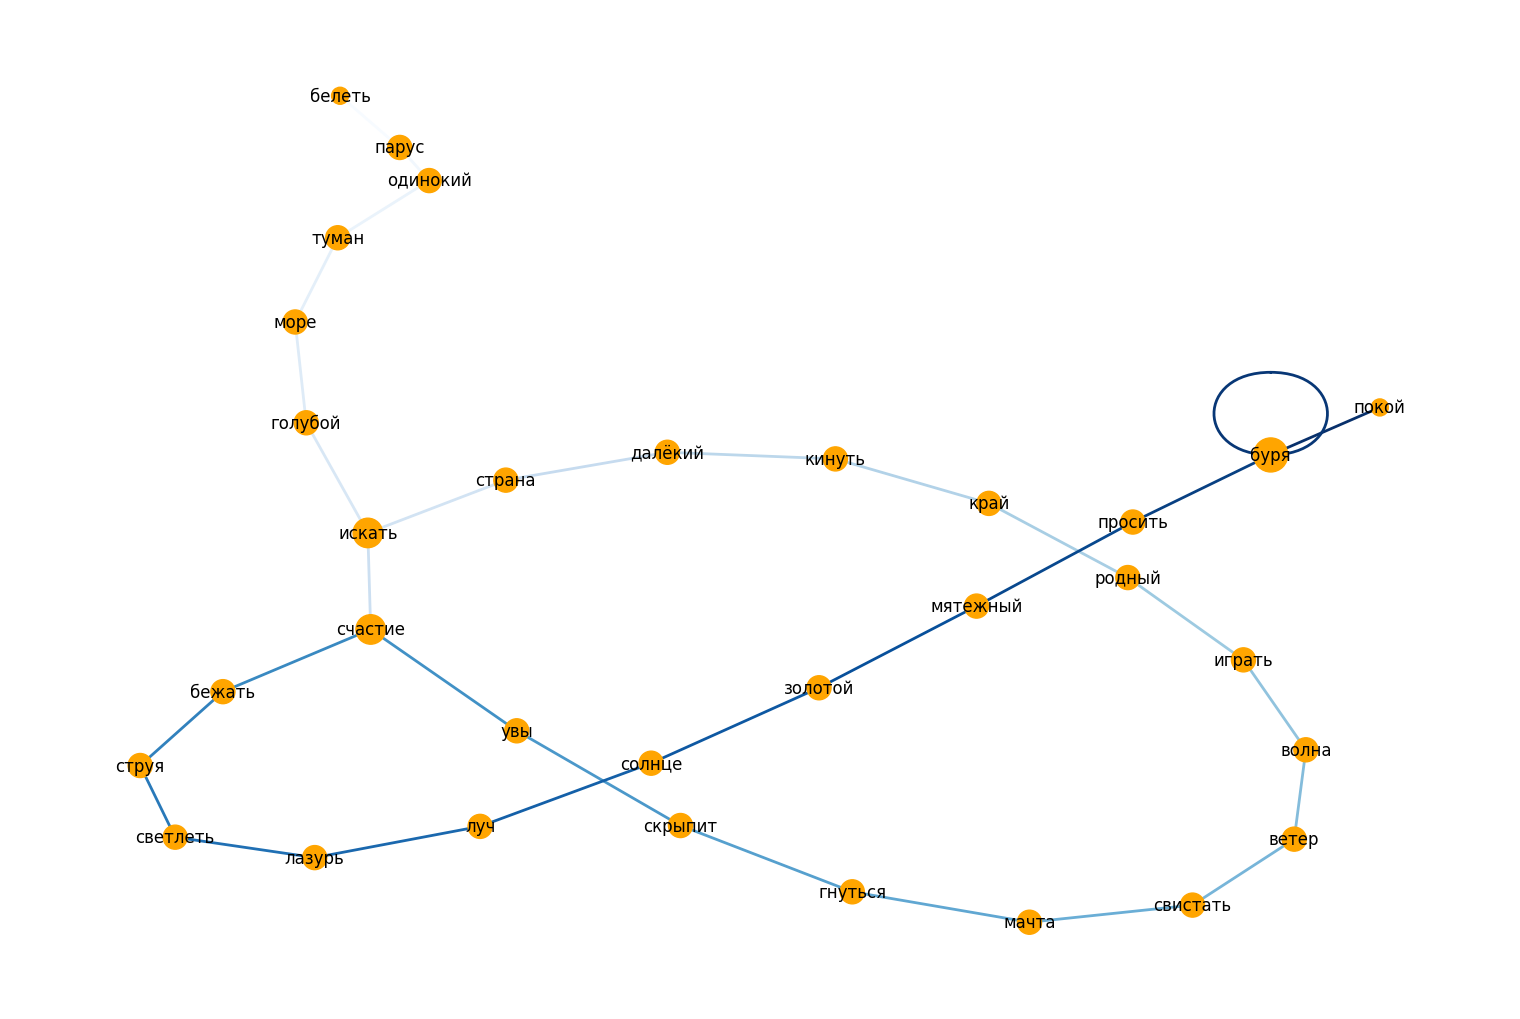

In [ ]:
# формирование пар слов для графа
edges = [(pair[0], pair[1], val) for pair, val in word_pairs.items()]

# создание графа
G = nx.Graph()

# добавление ребер на граф
G.add_weighted_edges_from(edges)

# увеличение размера вершин для визуализации
node_sizes = [deg*150 for node, deg in G.degree()]

# визуализация графа
plt.figure(figsize=(15,10))
pos = nx.layout.spring_layout(G)
edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())
nx.draw(G, pos, node_color='orange',
        node_size=node_sizes,
        edge_color=range(len(G.edges())), width=2.0,
        with_labels=True, edge_cmap=plt.cm.Blues)
plt.show()

Получился граф, по которому можно отследить связи между словами в тексте и увидеть в целом структуру документа.

### Задание 4



Постройте граф ключевых (наиболее частотных по корпусу) слов для аннотаций из таблицы `descriptions.xlsx`.

Для этого необходимо сделать предобработку, включающую токенизацию, лемматизацию и очистку текста. При построении графа учтите следующие условия:
* ключевым словом может быть только существительное;
* ключевое слово не может быть стоп-словом;
* общее количество вершин должно быть в диапазоне от 50 до 100;
* между двумя словами есть связь, если они встретились в одном документе;
* вес ребра между вершинами равен количеству документов, в которых два;
рассматриваемых слова встретились вместе;
* не включайте в граф ребра с весом меньше 2;
* при визуализации настройте размер вершины (по степени) и толщину ребер (по весу).


In [ ]:
# PUT YOUR CODE HERE

### Задание 5

Постройте граф предметных областей для таблицы `items.xlsx` по следующим правилам:
- считайте, что между двумя предметными областями есть связь, если учебные сущности из них встретились в названии и/или аннотации одной дисциплины;
- учебная сущность входит в название и/или аннотацию дисциплины, если после предобработки, включающей очистку и лемматизацию, строка или ее дубликат полностью входит в текст названия и/или аннотации, прошедший точно такую же предобработку.

Ответьте на вопросы:
1. Есть ли на вашем графе висячие вершины?
2. Какая вершина является центральной по степени?
3. Какое ребро (если ребра есть) имеет наибольший вес?

In [ ]:
# PUT YOUR CODE HERE

# Порядок защиты работы

**Для защиты работы необходимо:**
1. Предоставить результаты выполнения заданий в виде ссылки на Google Colab.
2. Выполнить дополнительное задание в процессе сдачи работы. Дополнительное задание представляет собой обработку данных лабораторной работы, по сложности аналогичную тем, что требовалось выполнить в рамках работы.

**Примеры дополнительных заданий:**
1. Проверьте, всегда ли сущности-дубликаты относятся к одной предметной области. Если нет, покажите несколько примеров, когда это не так.
2. Найдите три вершины на графе ключевых слов из задания 4, обладающих максимальными значениями центральности по посредничеству, а также три вершины с наибольшими степенями. Есть ли в полученных списках общие вершины?
3. Придумайте один критерий, не приведенный в списке критериев к заданию 3, и реализуйте его.

# Дополнительные материалы

1. NetworkX. Network Analysis in Python [Электронный ресурс]. URL: https://networkx.org/ (дата обращения: 02.04.2024).